In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
X = housing.data
y = housing.target

Separación de los datos:

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Los datos de las X deben estar escaladas

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
y_train

array([0.673, 3.158, 2.583, ..., 0.729, 2.765, 1.566])

In [9]:
X_train.shape

(11610, 8)

### Creación de una red neuronal (modelo)
Función secuencial que le pasamos una lista de capas.

In [10]:
#Api funcional
inputs = keras.Input((8,))
hidden1 = keras.layers.Dense(30, activation="relu")(inputs)
outputs = keras.layers.Dense(1)(hidden1)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)), # Capa de entrada de 8 
    # Otra forma para ahorrar las 2 primeras líneas de la creación de la red neuronal:
    # keras.layers.Dense(30, activation='relu', input_shape=(8,)), Tiene una capa de entrada que tiene 8 neuronas
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)   # Capa de salida (un valor de salida)
])

Para decirle la **función de error** que va utilizar hay que compilar:

In [12]:
# Error Medio Cuadrático
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(learning_rate=0.001))

El **optimizador** es para gestionar los pesos de las neuronas

Para enseñar lo que tiene:

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10000,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_data=(X_val, y_val)
)

Epoch 1/10000


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.5654 - val_loss: 1.2447
Epoch 2/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.9381 - val_loss: 0.8285
Epoch 3/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.7637 - val_loss: 0.7411
Epoch 4/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.7041 - val_loss: 0.6902
Epoch 5/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.6595 - val_loss: 0.6495
Epoch 6/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.6221 - val_loss: 0.6151
Epoch 7/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.5906 - val_loss: 0.5864
Epoch 8/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.5641 - val_loss: 0.5624
Epoch 9/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.5420 - val_loss: 0.5419
Epoch 10/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.5233 - val_loss: 0.5248
Epoch 11/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.5075 - val_loss: 0.5101
Epoch 12/1000

En caso de tener valores de validación se los ponemos:

In [15]:
# model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

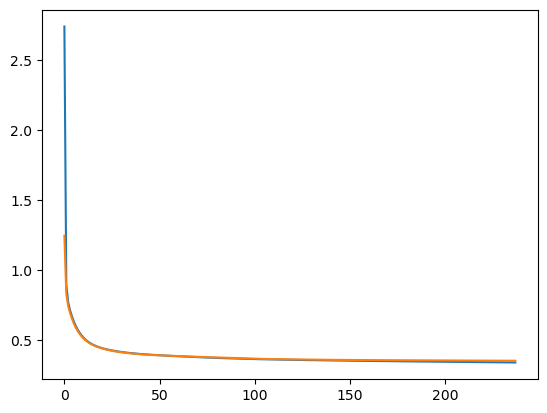

In [16]:
plt.plot(pd.DataFrame(model.history.history))

In [17]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.3583


0.3643883466720581

In [18]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.7425575],
       [2.0484402],
       [0.7951943]], dtype=float32)

In [19]:
#TensorBoard
root_logdir = os.path.join(".", "my_logs")
#root_logdir = "./my_logs"

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, tensorboard_cb])

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} . is not a directory [Op:CreateSummaryFileWriter] name: 

In [ ]:
"""
    Si se está en una terminal:
    tensorboard --lodir = ./my_logs --port = 6006

    Si se está en un colab:
    %load_ext tensorboard
    %tensorboard --logdir = ./my_logs --port = 6006
"""

%load_ext tensorboard
%tensorboard --logdir = ./my_logs --port = 6006